In [174]:
import os 
import json 
import pandas as pd 
import numpy as np

In [175]:
Img_Format = 'png'

In [176]:
home = os.getcwd()
main = os.path.join(home,'Main_Result')
supp = os.path.join(home,'Supplementary_Result')
Top_folder = os.path.join(home,'Top Vals')
AA_folder = os.path.join(home,'Aggregated Average')

In [177]:
main_files = [ os.path.join(main,i) for i in os.listdir(main) if i != 'Base.csv' and i != 'Avg.csv'  and i.endswith('.csv')]
Base_file = os.path.join(main,'Base.csv')

In [178]:
df = pd.read_csv(main_files[0],index_col=[0])
df.columns

Index(['ID', 'Accuracy', 'Time Taken (s)', 'Energy Used (J)',
       'Equivalent CO2 Emission (mg)'],
      dtype='object')

In [179]:
Avg_Dict = dict()

TOP_vals = 10

for curr_file in main_files:
    df = pd.read_csv(curr_file,index_col=[0])
    #print(df.columns)
    df = df.sort_values(by='Energy Used (J)',ascending=True)
    df = df.sort_values(by='Accuracy',ascending=False)
    df = df[:TOP_vals]
    Key = list(df['ID'])[0][:3]
    Inner_Dict = {'Keys' : list(df['ID'])}
    df_cols = list(df.columns)
    try:df_cols.remove('ID')
    except: print('ID not there')
    for curr_col in df_cols:
        Inner_Dict[f'Avg {curr_col.strip()}'] = np.average(df[curr_col])

    Avg_Dict[Key] = Inner_Dict

In [180]:
new_df = pd.DataFrame(data=Avg_Dict).T
new_df.to_csv(os.path.join(main,'Avg.csv'))

Bat.csv


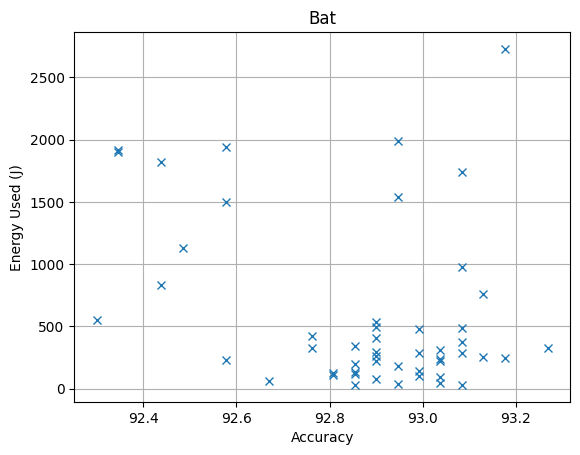

Camel Algorithm.csv


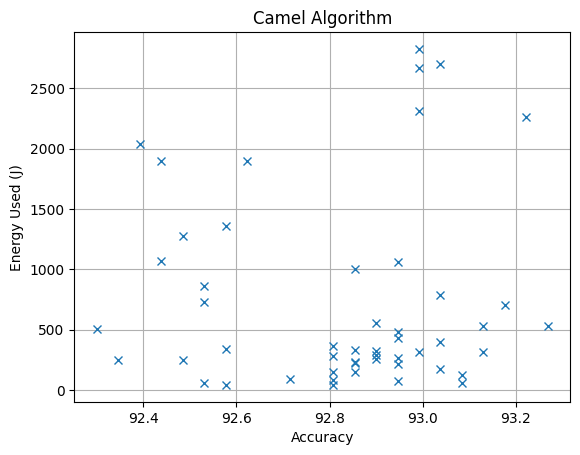

Cuckoo Search.csv


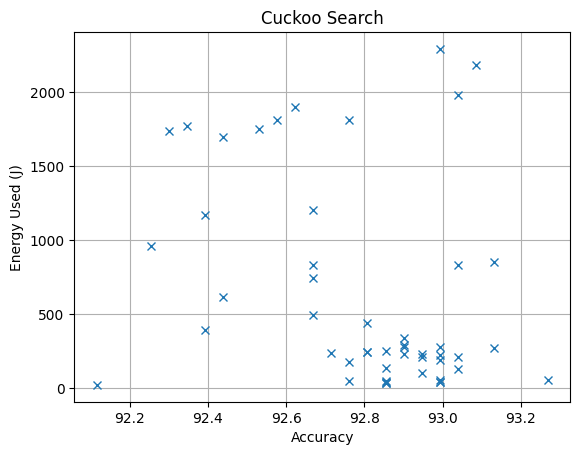

Fire Fly.csv


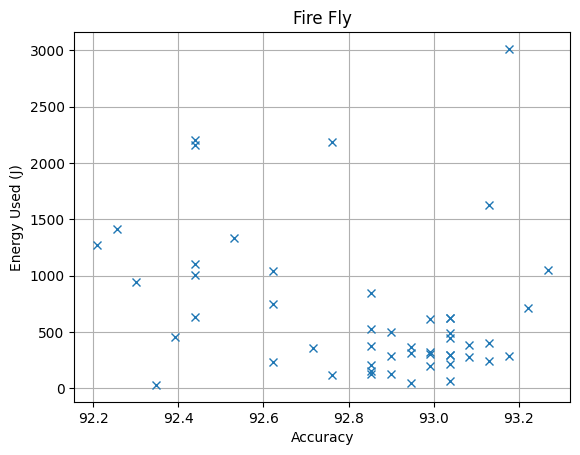

Particle Swarm.csv


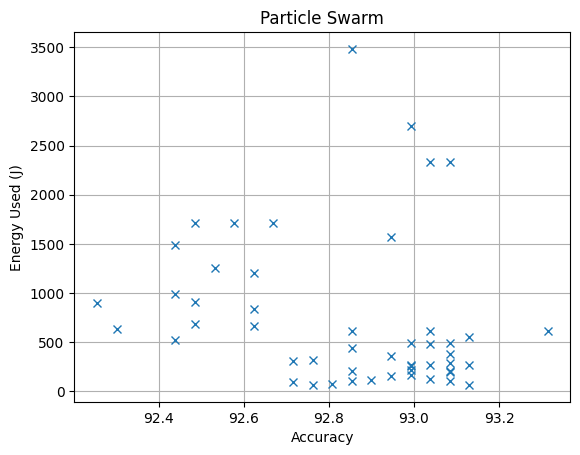

In [181]:
from matplotlib import pyplot as plt 
try:
    os.mkdir('Extra')
except:
    pass
extra = os.path.join(home,'Extra')
for i in main_files:
    df = pd.read_csv(i,index_col=[0])
    df = df.sort_values(by='Energy Used (J)',ascending=True)
    df = df.sort_values(by='Accuracy',ascending=False)
    print(os.path.basename(i))
    plt.close()
    plt.plot(df['Accuracy'],df['Energy Used (J)'],'x')
    plt.grid(True)
    plt.xlabel('Accuracy')
    plt.ylabel('Energy Used (J)')
    plt.title(os.path.basename(i).split('.')[0])
    plt.savefig(os.path.join(extra,f"{os.path.basename(i).split('.')[0]} Energy Vs Accuracy.{Img_Format}"))
    plt.show()


In [182]:
df = pd.read_csv(os.path.join(main,'Avg.csv'),index_col=[0])
print(df.columns)
'''
accuracy = df[['Avg Accuracy']].T
energy = df[['Avg Energy Used (J)']].T
sns.catplot(
        #x='Avg Accuracy',
        #y='',
        data=accuracy, 
        kind='bar',
        height=5,
        aspect=7)
''' 
df = df[['Avg Accuracy','Avg Energy Used (J)', 'Keys','Avg Equivalent CO2 Emission (mg)']]
df['Avg Accuracy'] = round(df['Avg Accuracy'],3)
df['Avg Equivalent CO2 Emission (mg)'] = round(df['Avg Equivalent CO2 Emission (mg)'],3)
df['Avg Energy Used (J)'] = round(df['Avg Energy Used (J)'],3)
df['Keys'] = df['Keys'].keys()
print(df['Keys'])
print(df.columns)

Index(['Keys', 'Avg Accuracy', 'Avg Time Taken (s)', 'Avg Energy Used (J)',
       'Avg Equivalent CO2 Emission (mg)'],
      dtype='object')
BAT    BAT
CAM    CAM
CUC    CUC
FIR    FIR
PAR    PAR
Name: Keys, dtype: object
Index(['Avg Accuracy', 'Avg Energy Used (J)', 'Keys',
       'Avg Equivalent CO2 Emission (mg)'],
      dtype='object')


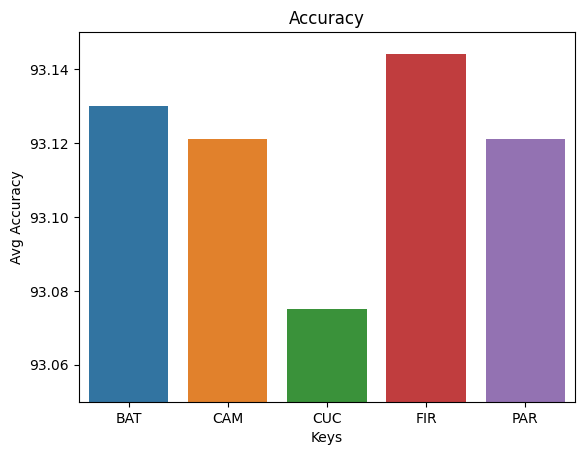

In [183]:
import seaborn as sns

plt.close()
fig, ax = plt.subplots()
sns.barplot(x=df['Keys'],y=df['Avg Accuracy'], ax=ax)
#sns.barplot(data, ax=ax)
#ax.set_xlim(89, 91)
ax.set_ylim(93.05, 93.15)
plt.title('Accuracy')
plt.savefig(os.path.join(extra,f'Accuracy.{Img_Format}'))
plt.show()



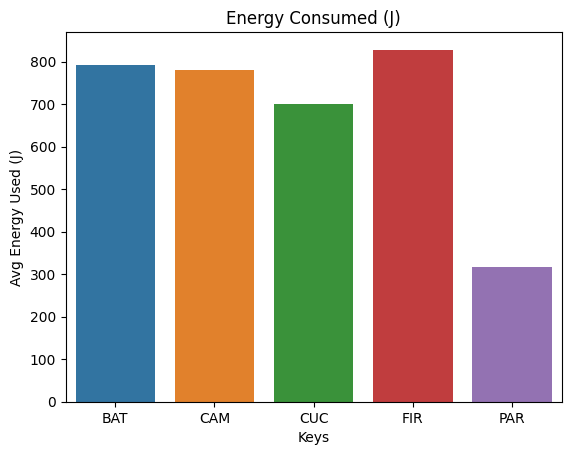

BAT    792.46
CAM    779.44
CUC    700.11
FIR    827.82
PAR    317.35
Name: Avg Energy Used (J), dtype: float64


In [184]:
plt.close()
# depict visualization
fig, ax = plt.subplots()
sns.barplot(x=df['Keys'],y=df['Avg Energy Used (J)'], ax=ax)
#sns.barplot(data, ax=ax)
#ax.set_xlim(89, 91)
#ax.set_ylim(300,900)
plt.title('Energy Consumed (J)')
plt.savefig(os.path.join(extra,f'Energy Consumed.{Img_Format}'))
plt.show()
print(df['Avg Energy Used (J)'])

Index(['Avg Accuracy', 'Avg Energy Used (J)', 'Keys',
       'Avg Equivalent CO2 Emission (mg)'],
      dtype='object')


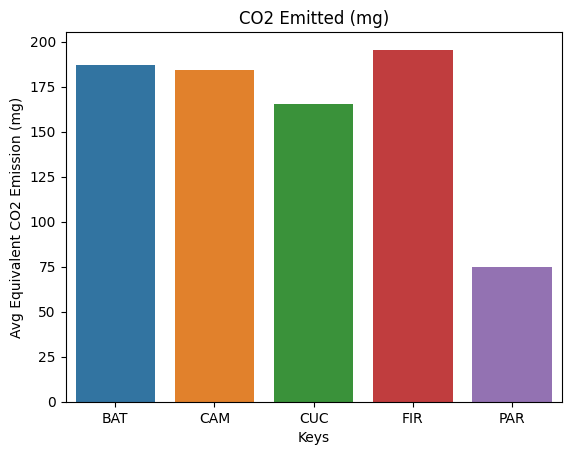

BAT    187.109
CAM    184.034
CUC    165.304
FIR    195.457
PAR     74.930
Name: Avg Equivalent CO2 Emission (mg), dtype: float64


In [185]:
plt.close()
# depict visualization
fig, ax = plt.subplots()
print(df.columns)
sns.barplot(x=df['Keys'],y=df['Avg Equivalent CO2 Emission (mg)'], ax=ax)
#sns.barplot(data, ax=ax)
#ax.set_xlim(89, 91)
#ax.set_ylim(70,200)
plt.title('CO2 Emitted (mg)')
plt.savefig(os.path.join(extra,f'CO2 Emitted.{Img_Format}'))
plt.show()
print(df['Avg Equivalent CO2 Emission (mg)'])

BAT    0.117520
CAM    0.119472
CUC    0.132943
FIR    0.112517
PAR    0.293433
dtype: float64


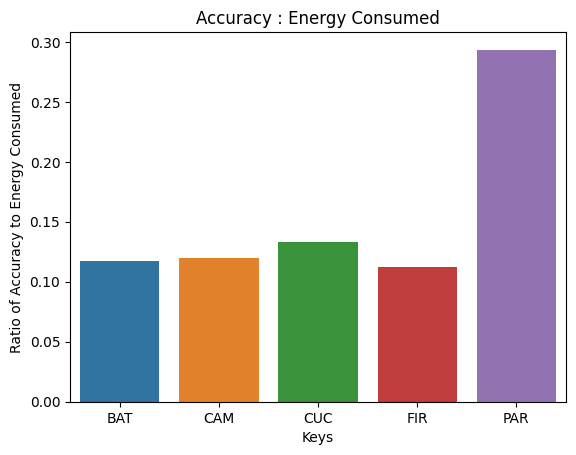

In [186]:
plt.close()
# depict visualization
fig, ax = plt.subplots()
new_y = df['Avg Accuracy'] / df['Avg Energy Used (J)']
print(new_y)
sns.barplot(x=df['Keys'],y=new_y, ax=ax)
#sns.barplot(data, ax=ax)
#ax.set_xlim(89, 91)
#ax.set_ylim(0.15,0.45)
ax.set_ylabel('Ratio of Accuracy to Energy Consumed')
plt.title('Accuracy : Energy Consumed')
plt.savefig(os.path.join(extra,f'Accuracy_to_Energy Consumed.{Img_Format}'))
plt.show()

In [187]:
def Add_Table(df,doc):
    t = doc.add_table(rows=(df.shape[0]+1), cols=df.shape[1])
    #t.style = 'TableGrid'
    #print( f'({df.shape[0]+1}, {df.shape[1]})' )

    for i in range(df.shape[1]):
        t.cell(0, i).text = df.columns[i]
        #t.cell(0, i).style = 'bold'
        t.rows[0].cells[i].paragraphs[0].runs[0].font.bold = True

    #t.row_cells[0].font.bold = True
        #t.cell(0, i).font.bold = True
        #run.font.bold = True
        #print( f'(0, {i}) = {t.cell(0, i).text}',end=' ')
    #print('')

    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            t.cell(i + 1, j).text = str(df.iat[i, j])
            #print( f'({i+1}, {j}) = {t.cell(i + 1, j).text}',end=' ')
        #print('')
    return doc 

In [188]:
from docx.enum.text import WD_ALIGN_PARAGRAPH

def Para_Type(doc,sent:str,bold:bool=False,italic:bool=False,underline:bool=False,Align:str='LEFT'):
    p = doc.add_paragraph()
    runner = p.add_run(sent)
    if bold is True:
        runner.bold = True
    if italic is True:
        runner.italic = True
    if underline is True:
        runner.underline = True
    Align_lst = ['LEFT','CENTER','RIGHT','JUSTIFY','DISTRIBUTE','JUSTIFY_MED','JUSTIFY_HI','JUSTIFY_LOW','THAI_JUSTIFY']
    Align = Align.upper()
    if Align in Align_lst:
        p.alignment = eval(f'WD_ALIGN_PARAGRAPH.{Align}')

    return doc 

In [189]:
from docx import Document

document = Document()

document = Para_Type(document,'Analyzing and Rating Greenness of Nature-Inspired Algorithms\n(Supplementary)',True,True,True,'CENTER')

document = Para_Type(document,'Base Metrics',True,True,True,'CENTER')

document =  Para_Type(document,f'\n\tT#1.0 Base Main Result\n', bold=True,italic=True)
df = pd.read_csv(os.path.join(main,'Base.csv'),index_col=[0])
document = Add_Table(doc=document,df=df)

document =  Para_Type(document,f'\n\tT#1.1 Base Energy Distribution\n', bold=True,italic=True)
df = pd.read_csv(os.path.join(supp,'Base_Energy_Distribution.csv'),index_col=[0])
document = Add_Table(doc=document,df=df)

document.add_page_break()

In [190]:

Algos = [ os.path.basename(i)[:-4] for i in main_files]
Algo_sent = 'Algorithms Analyzed Are:-\n'

for i in Algos:
    Algo_sent = f'{Algo_sent} ->{i}\n'

document = Para_Type(document,Algo_sent,True,True,True,'CENTER')

#document.add_page_break()


In [191]:
for i in range(len(Algos)):
    document.add_section()

    document = Para_Type(document,f'\t NIA {Algos[i]}\n', bold=True,underline=True,Align='Center')
    #Algo Name
    
    document.add_picture(os.path.join(supp,f'{Algos[i]}_Iterations.{Img_Format}'))
    document =  Para_Type(document,f'\n\tFig#{i+1}.0 {Algos[i]} Iterations\n', bold=True,italic=True,Align='Center')
    #Iter Line Graph
    
    document =  Para_Type(document,f'\n\tT#{i+2}.0 {Algos[i]} Main Result\n', bold=True,italic=True,Align='Center')
    df = pd.read_csv(os.path.join(main,f'{Algos[i]}.csv'),index_col=[0])
    document = Add_Table(df,document)
    #Iter Main Points

    document =  Para_Type(document,f'\n\tT#{i+2}.1 {Algos[i]} Parameters\n', bold=True,italic=True,Align='Center')
    df = pd.read_csv(os.path.join(supp,f'{Algos[i]}_Parameter.csv'),index_col=[0])
    document = Add_Table(df,document)
    #Iter Parameter
    
    document =  Para_Type(document,f'\n\tT#{i+2}.2 {Algos[i]} Energy Distribution\n', bold=True,italic=True,Align='Center')
    df = pd.read_csv(os.path.join(supp,f'{Algos[i]}_Energy_Distribution.csv'),index_col=[0])
    document = Add_Table(df,document)
    #Iter Energy Distribution

    document.add_picture(os.path.join(extra,f'{Algos[i]} Energy Vs Accuracy.{Img_Format}'))
    document =  Para_Type(document,f'\n\tFig#{i+1}.1 {Algos[i]} Energy Vs Accuracy\n', bold=True,italic=True,Align='Center')

    document =  Para_Type(document,f'\n\tT#{i+2}.3 {Algos[i]} Top {TOP_vals} Values\n', bold=True,italic=True,Align='Center')
    df = pd.read_csv(os.path.join(Top_folder,f'{Algos[i]}_peak_values.csv'),index_col=[0])
    document = Add_Table(df,document)

    document.add_page_break()



In [192]:
Curr_Table_No = len(Algos) + 3
Curr_Fig_No = Curr_Table_No - 1 

Curr_sent = f'Aggregated Analysis Results of Top {TOP_vals}'
document = Para_Type(document,Curr_sent,True,True,True,'CENTER')

Curr_sent = f'T#{Curr_Table_No} Aggregated Average'
document = Para_Type(doc=document,sent=Curr_sent,bold=True,italic=True,underline=False,Align='Center')
df = pd.read_csv(os.path.join(AA_folder,'Aggregated Average.csv'),index_col=[0])
document = Add_Table(doc=document,df=df)
Curr_Table_No+=1
#Main avg table

document.add_picture(os.path.join(AA_folder,f'Aggregated Average algo.{Img_Format}'))
document =  Para_Type(document,f'Fig#{Curr_Fig_No} Aggregated Average Energy Consumption based distribution', bold=True,italic=True,Align='Center')
Curr_Fig_No+=1
#avg graph#1

document.add_picture(os.path.join(AA_folder,f'Aggregated Average sector.{Img_Format}'))
document =  Para_Type(document,f'Fig#{Curr_Fig_No} Aggregated Average Algorithm based distribution', bold=True,italic=True,Align='Center')
Curr_Fig_No+=1
#avg graph#2

document.add_page_break()

In [193]:
Curr_sent = f'T#{Curr_Table_No} CPU Energy Consumption as compaired to PSO'
document = Para_Type(doc=document,sent=Curr_sent,bold=True,italic=True,underline=False,Align='Center')
df = pd.read_csv(os.path.join(AA_folder,'Aggregated Average CPU Ratio.csv'),index_col=[0])
document = Add_Table(doc=document,df=df)
Curr_Table_No+=1

document.add_picture(os.path.join(AA_folder,f'CPU.{Img_Format}'))
document =  Para_Type(document,f'Fig#{Curr_Fig_No} CPU Energy Consumption Raito', bold=True,italic=True,Align='Center')
Curr_Fig_No+=1
'''
CPU
'''

Curr_sent = f'T#{Curr_Table_No} Total(all parts) Energy Consumption as compaired to PSO'
document = Para_Type(doc=document,sent=Curr_sent,bold=True,italic=True,underline=False,Align='Center')
df = pd.read_csv(os.path.join(AA_folder,'Aggregated Average Total Energy Ratio.csv'),index_col=[0])
document = Add_Table(doc=document,df=df)
Curr_Table_No+=1

document.add_picture(os.path.join(AA_folder,f'Total Energy.{Img_Format}'))
document =  Para_Type(document,f'Fig#{Curr_Fig_No} Total(all parts) Energy Consumption Raito', bold=True,italic=True,Align='Center')
Curr_Fig_No+=1
'''
Total Energy
'''

Curr_sent = f'T#{Curr_Table_No} Time Taken as compaired to PSO'
document = Para_Type(doc=document,sent=Curr_sent,bold=True,italic=True,underline=False,Align='Center')
df = pd.read_csv(os.path.join(AA_folder,'Aggregated Average Time Taken Ratio.csv'),index_col=[0])
document = Add_Table(doc=document,df=df)
Curr_Table_No+=1

document.add_picture(os.path.join(AA_folder,f'Time Taken.{Img_Format}'))
document =  Para_Type(document,f'Fig#{Curr_Fig_No} Time Taken Raito', bold=True,italic=True,Align='Center')
Curr_Fig_No+=1
'''
Time
'''

Curr_sent = f'T#{Curr_Table_No} Average Power Consumption as compaired to PSO'
document = Para_Type(doc=document,sent=Curr_sent,bold=True,italic=True,underline=False,Align='Center')
df = pd.read_csv(os.path.join(AA_folder,'Aggregated Average Power Consumption  Ratio.csv'),index_col=[0])
document = Add_Table(doc=document,df=df)
Curr_Table_No+=1

document.add_picture(os.path.join(AA_folder,f'Power Consumption.{Img_Format}'))
document =  Para_Type(document,f'Fig#{Curr_Fig_No} Average Power Consumption Raito', bold=True,italic=True,Align='Center')
Curr_Fig_No+=1
'''
POWER
'''

document.add_page_break()

In [194]:
Curr_sent = f'T#{Curr_Table_No} Main Result (Average)'
document = Para_Type(doc=document,sent=Curr_sent,bold=True,italic=True,underline=False,Align='Center')
df = pd.read_csv(os.path.join(main,'Avg.csv'),index_col=[0])
document = Add_Table(doc=document,df=df)
Curr_Table_No+=1

document.add_picture(os.path.join(extra,f'Accuracy.{Img_Format}'))
document =  Para_Type(document,f'Fig#{Curr_Fig_No} Accuracy', bold=True,italic=True,Align='Center')
Curr_Fig_No+=1

document.add_picture(os.path.join(extra,f'Energy Consumed.{Img_Format}'))
document =  Para_Type(document,f'Fig#{Curr_Fig_No} Energy Consumed', bold=True,italic=True,Align='Center')
Curr_Fig_No+=1

document.add_picture(os.path.join(extra,f'CO2 Emitted.{Img_Format}'))
document =  Para_Type(document,f'Fig#{Curr_Fig_No} CO2 Emittion', bold=True,italic=True,Align='Center')
Curr_Fig_No+=1

document.add_picture(os.path.join(extra,f'Accuracy_to_Energy Consumed.{Img_Format}'))
document =  Para_Type(document,f'Fig#{Curr_Fig_No} Accuracy : Energy Consumed', bold=True,italic=True,Align='Center')
Curr_Fig_No+=1


In [195]:
document.save('Supplementary_file.docx')